In [1]:
# load the dataset
heartDF = spark.read.format("csv")\
            .option("inferSchema", True)\
            .option("header", True)\
            .load("file:///Users/Neeraj/Documents/Proj/Spark/data/heart.csv")

In [2]:
# preview loaded data
heartDF.show(5)

+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
| 63|  1|  3|     145| 233|  1|      0|    150|    0|    2.3|    0|  0|   1|     1|
| 37|  1|  2|     130| 250|  0|      1|    187|    0|    3.5|    0|  0|   2|     1|
| 41|  0|  1|     130| 204|  0|      0|    172|    0|    1.4|    2|  0|   2|     1|
| 56|  1|  1|     120| 236|  0|      1|    178|    0|    0.8|    2|  0|   2|     1|
| 57|  0|  0|     120| 354|  0|      1|    163|    1|    0.6|    2|  0|   2|     1|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
only showing top 5 rows



In [7]:
# lets examine attributes
import pandas as pd

hpd = heartDF.toPandas()
hpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int32
sex         303 non-null int32
cp          303 non-null int32
trestbps    303 non-null int32
chol        303 non-null int32
fbs         303 non-null int32
restecg     303 non-null int32
thalach     303 non-null int32
exang       303 non-null int32
oldpeak     303 non-null float64
slope       303 non-null int32
ca          303 non-null int32
thal        303 non-null int32
target      303 non-null int32
dtypes: float64(1), int32(13)
memory usage: 17.8 KB


In [6]:
heartDF.printSchema()

root
 |-- age: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- cp: integer (nullable = true)
 |-- trestbps: integer (nullable = true)
 |-- chol: integer (nullable = true)
 |-- fbs: integer (nullable = true)
 |-- restecg: integer (nullable = true)
 |-- thalach: integer (nullable = true)
 |-- exang: integer (nullable = true)
 |-- oldpeak: double (nullable = true)
 |-- slope: integer (nullable = true)
 |-- ca: integer (nullable = true)
 |-- thal: integer (nullable = true)
 |-- target: integer (nullable = true)



In [8]:
# describe the data
hpd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
# How many female patients had heart disease
females_with_heart_disease = heartDF.where("sex = 0 and target = 1")
females_no_heart_disease = heartDF.where("sex = 0 and target = 0")

In [11]:
# get counts of each
print("females_with_heart_disease: ", females_with_heart_disease.count())
print("females_no_heart_disease: ", females_no_heart_disease.count())


females_with_heart_disease:  72
females_no_heart_disease:  24


In [13]:
#max and min ages of female with heart disease
females_with_heart_disease.selectExpr("max(age) as max_age", "min(age) as min_age").show()

+-------+-------+
|max_age|min_age|
+-------+-------+
|     76|     34|
+-------+-------+



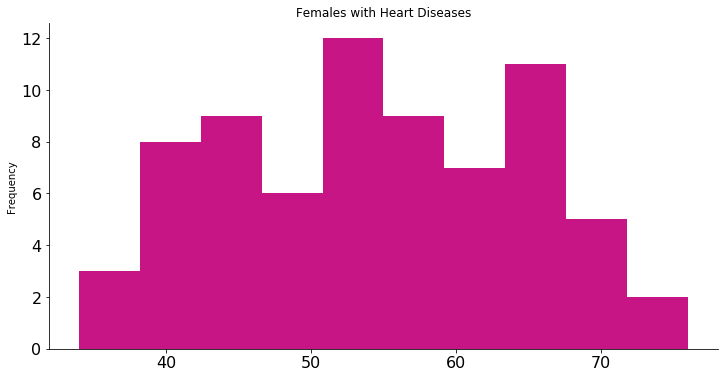

In [18]:
# plot the female patient's age groups and count
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ax = females_with_heart_disease.toPandas()['age'].plot.hist(
    figsize=(12,6),
    color='mediumvioletred',
    fontsize=16
)

ax.set_title('Females with Heart Diseases') 
sns.despine()

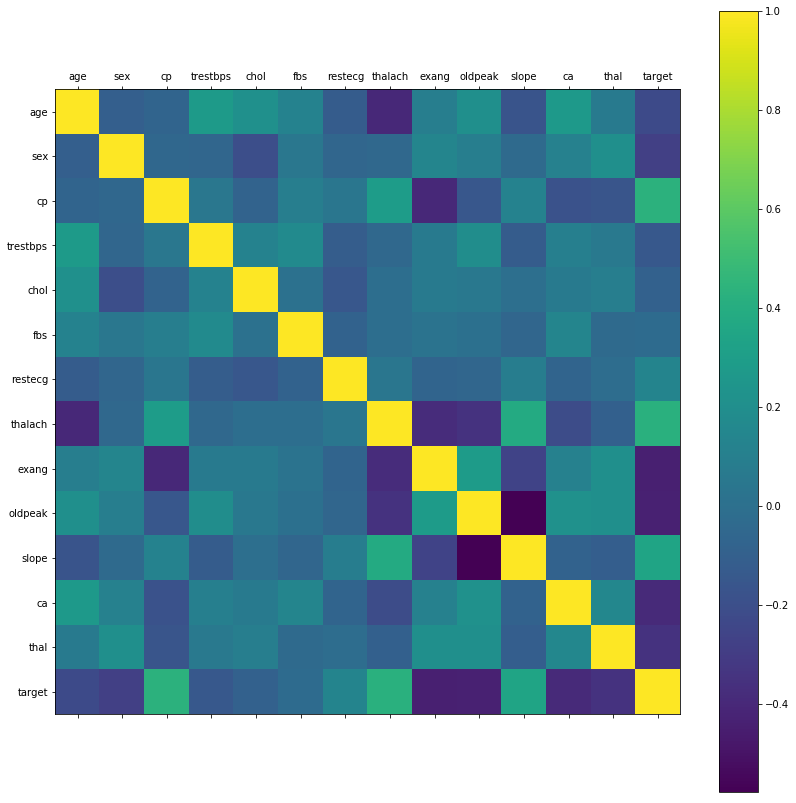

In [26]:
# Draw the correlation matrix for dataset
from matplotlib import rcParams
import numpy as np

rcParams['figure.figsize'] = 20,14
plt.matshow(hpd.corr())
plt.xticks(np.arange(hpd.shape[1]), hpd.columns)
plt.yticks(np.arange(hpd.shape[1]), hpd.columns)
plt.colorbar()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1257033c8>,
      dtype=object)

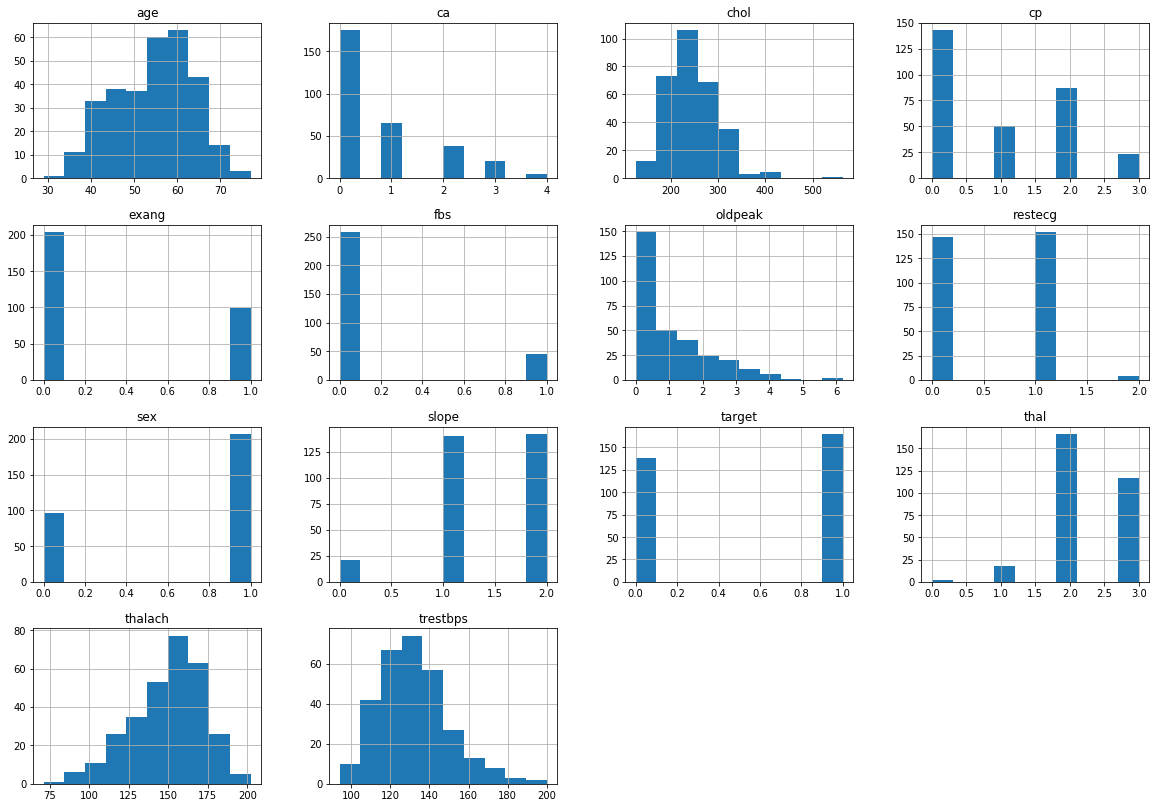

In [27]:
# plot the histograms to display various attributes
hpd.hist()

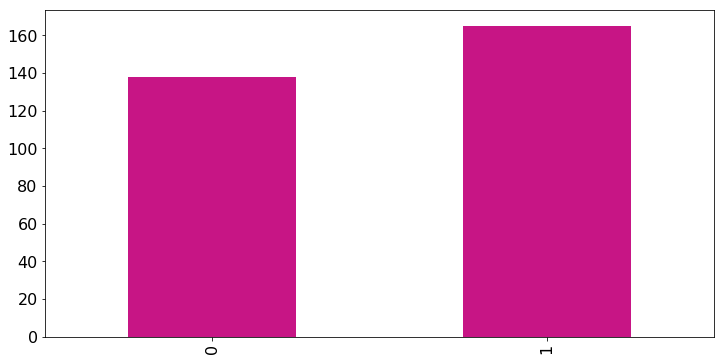

In [32]:
# is our dataset balanced
hpd['target'].value_counts().sort_index().plot.bar(
    figsize=(12,6),
    color='mediumvioletred',
    fontsize=16
)

# as the counts of both cases are close it is a balanced dataset, so we can proceed with data analysis